Estimating the compressive strength of concrete using multivariant regression analysis
--------------------------------
In this analysis, our aim is to predict the comrpressive strength of concerete by employing a multivariant linear regression model. We are using the data taken from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength). The features are divided into 7 different components and the age of the concerte in days.

You can see the list of the features in the table below:

In [2]:
import pandas as pd
from IPython.display import display, HTML
import re
# loading the dataset
df = pd.read_csv('Concrete_Data.csv')
# trimming the headers
pattern = r'(.*) \(component \d\)(\(.*\))'
df = df.rename(columns=lambda x: re.sub(pattern, r'\1 ($kg/m^3$)', x))
df.style.set_properties(**{'text-align': 'left'})

# display the first 5 rows of the table
display(HTML(df.head().to_html(index=False)))

Cement ($kg/m^3$),Blast Furnace Slag ($kg/m^3$),Fly Ash ($kg/m^3$),Water ($kg/m^3$),Superplasticizer ($kg/m^3$),Coarse Aggregate ($kg/m^3$),Fine Aggregate ($kg/m^3$),Age (day),"Concrete compressive strength(MPa, megapascals)"
540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


For a better understanding of the relation between each feature and the compressive strength of the concerete samples, we plot the scatter-plot of each feature with respect to the compressive strength.

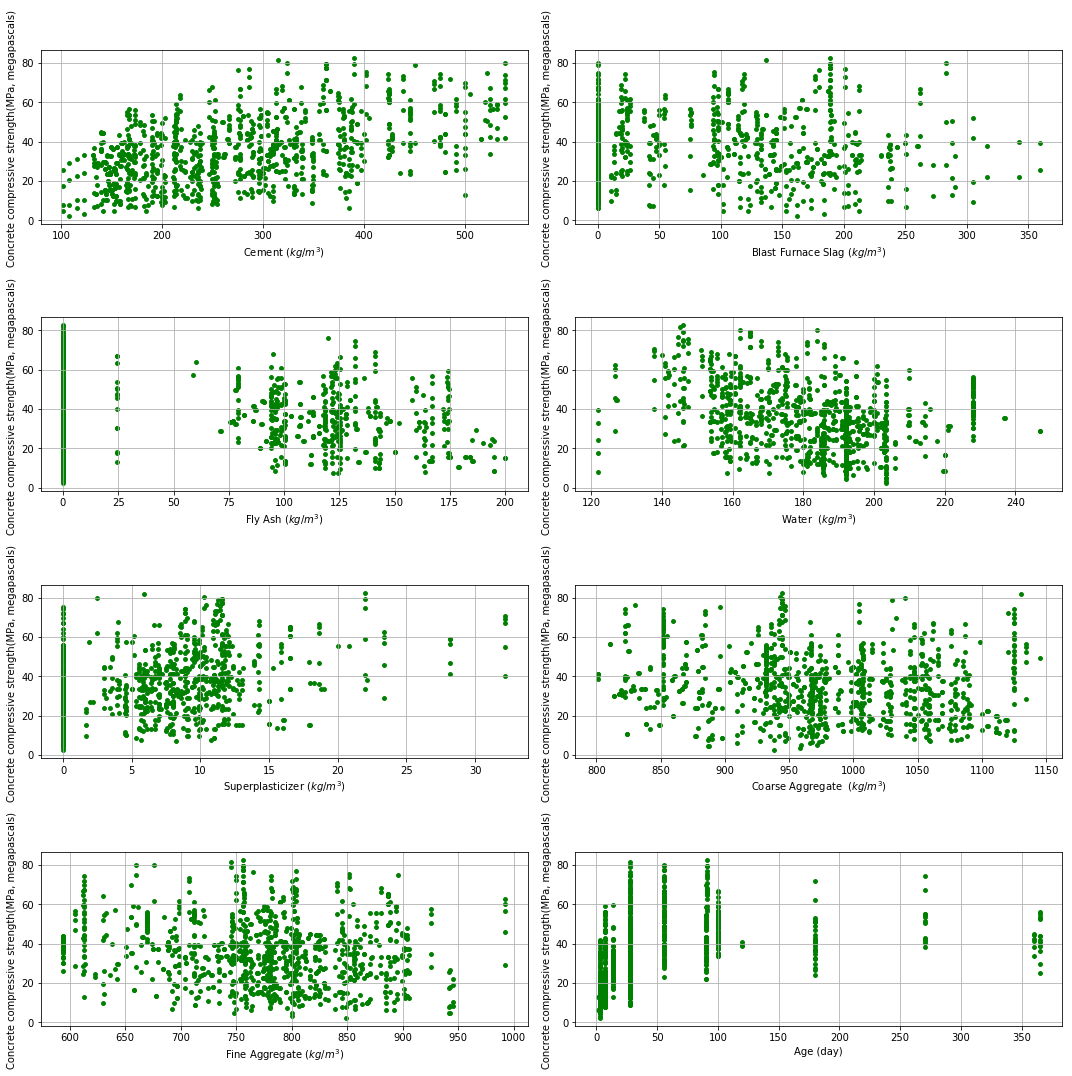

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

df.plot.scatter(0, 8, s=15, c='g', grid=True, ax=ax[0, 0])
df.plot.scatter(1, 8, s=15, c='g', grid=True, ax=ax[0, 1])
df.plot.scatter(2, 8, s=15, c='g', grid=True, ax=ax[1, 0])
df.plot.scatter(3, 8, s=15, c='g', grid=True, ax=ax[1, 1])
df.plot.scatter(4, 8, s=15, c='g', grid=True, ax=ax[2, 0])
df.plot.scatter(5, 8, s=15, c='g', grid=True, ax=ax[2, 1])
df.plot.scatter(6, 8, s=15, c='g', grid=True, ax=ax[3, 0])
df.plot.scatter(7, 8, s=15, c='g', grid=True, ax=ax[3, 1])
plt.tight_layout()
plt.show()

We split the dataset into two differen sets of training data and test data (15 %).

In [79]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, 0:7]
y = df.iloc[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

Now we can train our regression model in order to find the optimal weights.

In [101]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()  
regr.fit(x_train, y_train)

weight_df = pd.DataFrame(regr.coef_, x.columns, columns=['weight (slope)'])
weight_df

,weight (slope)
Cement ($kg/m^3$),0.110024
Blast Furnace Slag ($kg/m^3$),0.087388
Fly Ash ($kg/m^3$),0.061107
Water ($kg/m^3$),-0.099431
Superplasticizer ($kg/m^3$),0.377096
Coarse Aggregate ($kg/m^3$),0.017015
Fine Aggregate ($kg/m^3$),0.003468


Next, we try to estimate the compressive strength of the concrete samples from our test data.

In [93]:
cs_estimation = regr.predict(x_test)

estimation_df = pd.DataFrame({'Actual strength': y_test, 'estimation': cs_estimation})
estimation_df.head(10)

,Actual strength,estimation
747,26.06,48.078938
718,10.35,20.089351
175,79.30,54.769789
828,74.99,52.953691
713,9.69,29.117081
108,47.10,58.744257
403,59.00,49.069430
215,22.72,29.206360
1,61.89,56.228431
27,52.12,28.145630


Here we plot the probable density distribution of the variables to analyse if the data is normally distrbuted or not so that we could decide if we need to normalize our data.

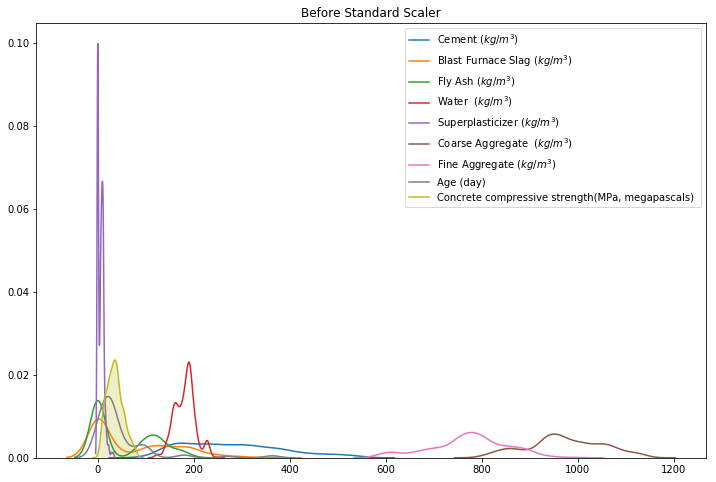

In [2]:
import seaborn as sns

# plotting the kernel density estimation of the features and the result (compressive strength) 
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.set_title('Kernel density estimation of the data')
ax1.set_title('Before Standard Scaler')
sns.kdeplot(df.iloc[:, 0], ax=ax1)
sns.kdeplot(df.iloc[:, 1], ax=ax1)
sns.kdeplot(df.iloc[:, 2], ax=ax1)
sns.kdeplot(df.iloc[:, 3], ax=ax1)
sns.kdeplot(df.iloc[:, 4], ax=ax1)
sns.kdeplot(df.iloc[:, 5], ax=ax1)
sns.kdeplot(df.iloc[:, 6], ax=ax1)
sns.kdeplot(df.iloc[:, 7], ax=ax1)
# shading the area below compressive strength (result)
sns.kdeplot(df.iloc[:, 8], ax=ax1, shade=True) 

As you can see in the above plot, the features are not normally distributed. Therefore we need to normalize the data before moving further. In order to scale the variables, we use scikitlearn to preprocess the data using standard scaler method.

In [103]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
display(HTML(scaled_df.head().to_html(index=False)))

Cement ($kg/m^3$),Blast Furnace Slag ($kg/m^3$),Fly Ash ($kg/m^3$),Water ($kg/m^3$),Superplasticizer ($kg/m^3$),Coarse Aggregate ($kg/m^3$),Fine Aggregate ($kg/m^3$),Age (day),"Concrete compressive strength(MPa, megapascals)"
2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


The new training and test sets are eliced from the scaled dataframe.

In [104]:
x = scaled_df.iloc[:, 0:7]
y = scaled_df.iloc[:, 8]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

And here we plot the probable density of the scaled data.

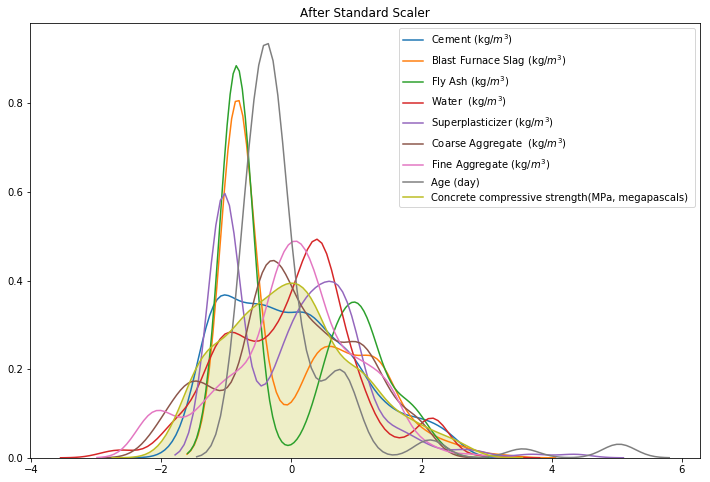

In [50]:
fig, ax2 = plt.subplots(figsize=(12, 8))
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df.iloc[:, 0], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 1], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 2], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 3], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 4], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 5], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 6], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 7], ax=ax2)
sns.kdeplot(scaled_df.iloc[:, 8], ax=ax2, shade=True)